In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

CARGO EL CSV CON SEPARADOR, YA QUE EL MISMO SE CARGA CON ";" EN LUGAR DE ","

ya que PANDAS lo lee como una sola columna.

In [31]:
# Subo archivo manualmente
uploaded = files.upload()

# Cargo dataset
df = pd.read_csv("precio-alquiler-deptos.csv", sep=";", encoding="utf-8")

Saving precio-alquiler-deptos.csv to precio-alquiler-deptos.csv


In [32]:
# Exploro datos
print(df.head())
print(df.info())
print(df.describe())

      barrio  anio  mes  precio_prom    ambientes  comuna
0  Agronomia  2013  Jul          NaN  3 ambientes      15
1  Agronomia  2013  Ago          NaN  3 ambientes      15
2  Agronomia  2013  Sep          NaN  3 ambientes      15
3  Agronomia  2013  Oct          NaN  3 ambientes      15
4  Agronomia  2013  Nov          NaN  3 ambientes      15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   barrio       7104 non-null   object 
 1   anio         7104 non-null   int64  
 2   mes          7104 non-null   object 
 3   precio_prom  1826 non-null   float64
 4   ambientes    7104 non-null   object 
 5   comuna       7104 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 333.1+ KB
None
              anio   precio_prom       comuna
count  7104.000000   1826.000000  7104.000000
mean   2016.081081   8572.612815     8.458333
std

In [33]:
# Convierto "precio_prom" a número (manejar valores vacíos con NaN)
df["precio_prom"] = pd.to_numeric(df["precio_prom"], errors="coerce")

In [34]:
# Elimino filas con valores faltantes en "precio_prom"
df.dropna(subset=["precio_prom"], inplace=True)

In [35]:
# Aplico One-Hot Encoding a "barrio", "mes" y "ambientes"
df_encoded = pd.get_dummies(df, columns=["barrio", "mes", "ambientes"], drop_first=True)

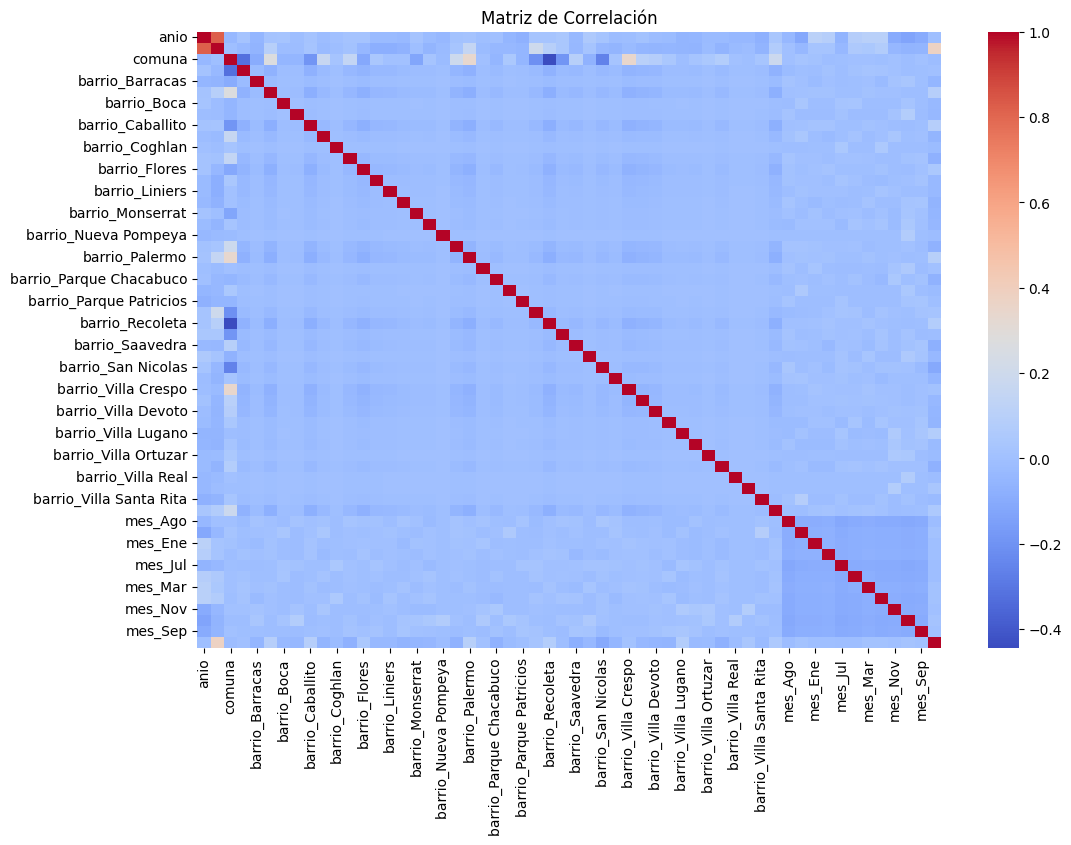

In [42]:
# Visualización de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [37]:
# Divido en datos de entrenamiento y prueba + separo "X" (características) e "y" (precio)
X = df_encoded.drop("precio_prom", axis=1)
y = df_encoded["precio_prom"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# 7. Entreno el Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [39]:
# 8. Predicciones
y_pred = modelo.predict(X_test)

In [40]:
# 9. Evaluación del modelo
print("🔹 MAE:", mean_absolute_error(y_test, y_pred))
print("🔹 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("🔹 R² Score:", r2_score(y_test, y_pred))

🔹 MAE: 1220.7787215445226
🔹 RMSE: 1545.3268958244178
🔹 R² Score: 0.8912257253264189
